In [1]:
import os
import io
import numpy as np
import matplotlib.pyplot as plt

# Put your directory files
work_dir = "./output_files/section4.1/L515/gazebo_ps"
# work_dir = "./output_files/section4.1/RM_d435i_with_ps"

# How many output do you have?
num_of_output = 149
# Because output.txt file starts 0th
num_of_output += 1

each_output = []
list_of_lists = []
for index in range(0, num_of_output):
    name = "output{index}.txt".format(index=index)
    path = os.path.join(work_dir, name)
    with io.open(path, mode="r", encoding="utf-8") as fd:
        output = fd.read().splitlines()[1:]  # Remove "Maps:" first row
        output_array = np.array(output)
        each_output.append(output_array)
    
    for line in each_output[index]:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        list_of_lists.append(line_list)

# Check the array length and first array        
print(len(list_of_lists[0]))
print(list_of_lists[0])

230
['0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '0.4', '

In [2]:
# If you set the node over 3000, the system will be killed.
# So, please set below than 3000.
op = []
out_op = []   
final_array = []
for node in range(0, 229):
    for time_step in range(0, num_of_output):
        x = list_of_lists[time_step][node]
        op.append(x)
        out = np.array(op)

    out_op.append(out)
    k = out_op[node][num_of_output*node:]
    z = np.array(k, dtype = np.float32)
    final_array.append(z)
    
# Check the final array
print(final_array)

[array([0.4     , 0.608696, 0.784   , 0.784   , 0.784   , 0.784   ,
       0.784   , 0.784   , 0.4     , 0.307692, 0.228571, 0.164948,
       0.12    , 0.12    , 0.12    , 0.12    , 0.12    , 0.12    ,
       0.12    , 0.12    , 0.12    , 0.12    , 0.12    , 0.12    ,
       0.12    , 0.12    , 0.12    , 0.12    , 0.12    , 0.12    ,
       0.12    , 0.12    , 0.12    , 0.12    , 0.12    , 0.12    ,
       0.12    , 0.12    , 0.12    , 0.12    , 0.4     , 0.307692,
       0.4     , 0.4     , 0.4     , 0.307692, 0.307692, 0.307692,
       0.4     , 0.608696, 0.784   , 0.784   , 0.784   , 0.784   ,
       0.784   , 0.784   , 0.784   , 0.784   , 0.784   , 0.784   ,
       0.784   , 0.784   , 0.784   , 0.784   , 0.784   , 0.784   ,
       0.784   , 0.784   , 0.784   , 0.784   , 0.784   , 0.784   ,
       0.784   , 0.784   , 0.784   , 0.784   , 0.784   , 0.784   ,
       0.784   , 0.784   , 0.784   , 0.784   , 0.784   , 0.784   ,
       0.784   , 0.784   , 0.784   , 0.784   , 0.784   , 0.78

In [17]:
# Make a x-axis = number of timestep
timesteps = []
for i in range(0, num_of_output):
    timesteps.append(i)


# Select the order of node

# Gazebo simulation with the plane segmentation results: 
# free celss = 6, 18, 59, 85, 135
# and occupied cells = 9, 10, 12, 13, 45, 71, 75, 83, 207
# and unknown celss = 42, 70, 74, 81


ord_node = [6, 85, 135]

# Calculate average the probabilites for each node
# avg_op_array = np.sum(final_array[ord_node]) / num_of_output
# avg_op = [avg_op_array] * num_of_output
# avg_op = np.array(avg_op)
# print(avg_op_array)
    
# Make the num of timestep into array
timesteps = []
for i in range(0, num_of_output):
    timesteps.append(i)

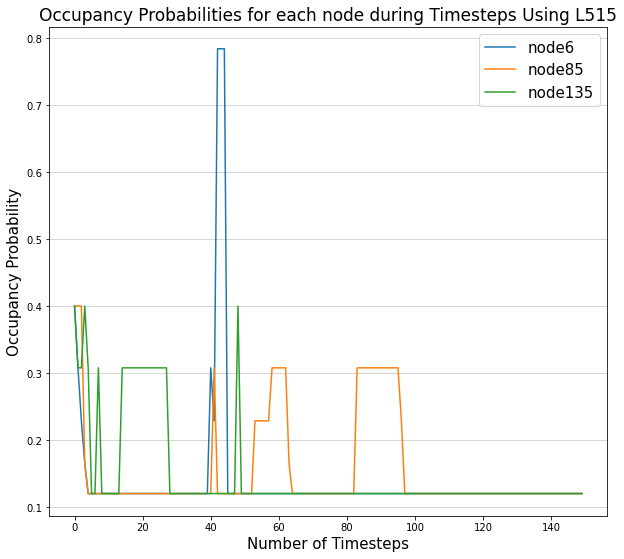

In [18]:
# Make a plot
f = plt.figure(figsize=(10, 9))
plt.xlabel("Number of Timesteps", fontsize=15)
plt.ylabel("Occupancy Probability", fontsize=15)
plt.title("Occupancy Probabilities for each node during Timesteps Using L515", fontsize=17)
# plt.plot(timesteps, avg_op, label="avg_op", linestyle="--", color="green", linewidth=5.0)
for i in ord_node:
    plt.plot(timesteps, final_array[i], label="node"+str(i))
#     plt.plot(timesteps, avg_op)
plt.legend(prop={'size': 15})
# plt.grid(axis="x", color='0.5')
plt.grid(axis="y", color='0.8')
plt.show()